In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Tabular Data

## Preprocess Tabular Data

### Training data

In [3]:
train_df= pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DF/HAM10000_metadata.csv")

In [4]:
# Check datatype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [5]:
train_df = train_df[['image_id','dx','dx_type', 'age', 'sex', 'localization']]

In [6]:
train_df.head()

,image_id,dx,dx_type,age,sex,localization
0,ISIC_0027419,bkl,histo,80.0,male,scalp
1,ISIC_0025030,bkl,histo,80.0,male,scalp
2,ISIC_0026769,bkl,histo,80.0,male,scalp
3,ISIC_0025661,bkl,histo,80.0,male,scalp
4,ISIC_0031633,bkl,histo,75.0,male,ear


#### One-Hot Encode Categorical Variables

In [7]:
# Perform one-hot encoding on the specified columns
train_df = pd.get_dummies(train_df, columns=['dx_type', 'sex', 'localization'])

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   image_id                      10015 non-null  object 
 1   dx                            10015 non-null  object 
 2   age                           9958 non-null   float64
 3   dx_type_confocal              10015 non-null  uint8  
 4   dx_type_consensus             10015 non-null  uint8  
 5   dx_type_follow_up             10015 non-null  uint8  
 6   dx_type_histo                 10015 non-null  uint8  
 7   sex_female                    10015 non-null  uint8  
 8   sex_male                      10015 non-null  uint8  
 9   sex_unknown                   10015 non-null  uint8  
 10  localization_abdomen          10015 non-null  uint8  
 11  localization_acral            10015 non-null  uint8  
 12  localization_back             10015 non-null  uint8  
 13  l

#### Normalize Numerical Data (Min=0, Max=100)

In [9]:
# Predefined min and max values
min_predefined = 0
max_predefined = 100

# Normalize the "age" column using the predefined min and max
train_df['age_normalized'] = (train_df['age'] - min_predefined) / (max_predefined - min_predefined)

# To ensure all values fall within [0, 1], you can clip values outside this range
train_df['age_normalized'] = train_df['age_normalized'].clip(lower=0, upper=1)

# Drop the "age" column
train_df.drop('age', axis=1, inplace=True)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   image_id                      10015 non-null  object 
 1   dx                            10015 non-null  object 
 2   dx_type_confocal              10015 non-null  uint8  
 3   dx_type_consensus             10015 non-null  uint8  
 4   dx_type_follow_up             10015 non-null  uint8  
 5   dx_type_histo                 10015 non-null  uint8  
 6   sex_female                    10015 non-null  uint8  
 7   sex_male                      10015 non-null  uint8  
 8   sex_unknown                   10015 non-null  uint8  
 9   localization_abdomen          10015 non-null  uint8  
 10  localization_acral            10015 non-null  uint8  
 11  localization_back             10015 non-null  uint8  
 12  localization_chest            10015 non-null  uint8  
 13  l

#### Missing values

In [11]:
train_df.isnull().sum().sort_values(ascending=False)

age_normalized                  57
localization_ear                 0
localization_upper extremity     0
localization_unknown             0
localization_trunk               0
localization_scalp               0
localization_neck                0
localization_lower extremity     0
localization_hand                0
localization_genital             0
localization_foot                0
localization_face                0
image_id                         0
dx                               0
localization_back                0
localization_acral               0
localization_abdomen             0
sex_unknown                      0
sex_male                         0
sex_female                       0
dx_type_histo                    0
dx_type_follow_up                0
dx_type_consensus                0
dx_type_confocal                 0
localization_chest               0
dtype: int64

Replace missing values with the mean.

In [12]:
train_df['age_normalized'] = train_df['age_normalized'].fillna(train_df['age_normalized'].mean())

#### Apply PCA (Feature Extraction)

In [13]:
from sklearn.decomposition import PCA

In [14]:
features_train_df = train_df.drop(columns=['image_id', 'dx'])

In [15]:
# Choose the number of components to retain
pca1 = PCA(n_components=23) #Retain 100% of the variance

# Fit PCA on the features data
pca1_train_features = pca1.fit_transform(features_train_df)

In [16]:
# Convert PCA Output to a DataFrame
pca_features_observation = pd.DataFrame(pca1_train_features)

The PCA-transformed features (pca_features_train_df) are now ready to be concatenated with image features. Note: the PCA features no longer correspond directly to original features in a one-to-one manner; they are transformations that capture the variance in data.

In [17]:
print(pca1.explained_variance_ratio_)

[2.62761035e-01 2.31434544e-01 1.03975596e-01 8.40614340e-02
 6.64861083e-02 5.98988621e-02 5.31578735e-02 3.75476343e-02
 2.33058118e-02 1.77912654e-02 1.30281528e-02 1.19646606e-02
 9.19661771e-03 6.92878397e-03 4.89536155e-03 4.21890826e-03
 3.38986541e-03 3.05631510e-03 2.52070552e-03 3.80464098e-04
 2.39592810e-30 1.31727248e-31 6.90637661e-32]


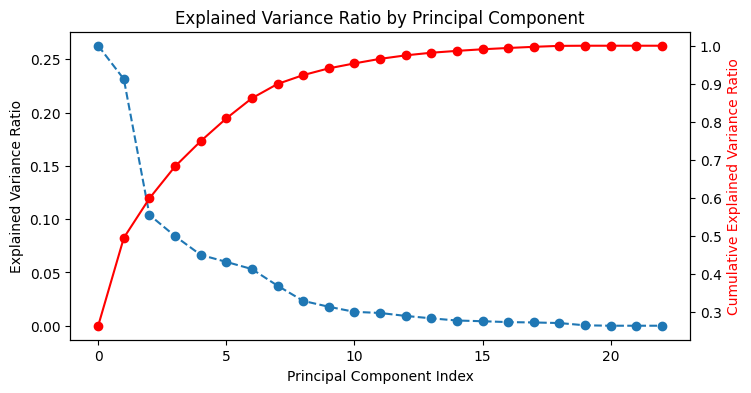

In [18]:
# Now, let's plot the explained variance ratio
plt.figure(figsize=(8, 4))
plt.plot(pca1.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')

# Adding a secondary axis to show the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca1.explained_variance_ratio_)
plt.twinx()  # instantiate a second axes that shares the same x-axis
plt.plot(cumulative_explained_variance, marker='o', linestyle='-', color='r')
plt.ylabel('Cumulative Explained Variance Ratio', color='r')
plt.grid(False)  # Turn off the grid for the secondary axis to improve readability

plt.show()

The elbow point is at PC7. So, dimentionality of the data is reduced by keeping the first "7" PCs.

In [19]:
# Choose the number of components to retain
pca2 = PCA(n_components=7)

# Fit PCA on the features data
pca2_train_features = pca2.fit_transform(features_train_df)

In [20]:
# Convert PCA Output to a DataFrame
pca_features_train = pd.DataFrame(pca2_train_features)

In [21]:
# Add 'image_id' and 'dx' columns back to the PCA features DataFrame
pca_features_train['image_id'] = train_df['image_id'].values
pca_features_train['dx'] = train_df['dx'].values

# 'image_id' and 'dx' as the first columns:
cols = pca_features_train.columns.tolist()
# Move 'image_id' and 'dx' to the front
cols = cols[-2:] + cols[:-2]
pca_features_train = pca_features_train[cols]

In [22]:
pca_features_train.head()

,image_id,dx,0,1,2,3,4,5,6
0,ISIC_0027419,bkl,-0.868984,-0.176534,0.175771,0.199935,-0.061637,0.046502,-0.089572
1,ISIC_0025030,bkl,-0.868984,-0.176534,0.175771,0.199935,-0.061637,0.046502,-0.089572
2,ISIC_0026769,bkl,-0.868984,-0.176534,0.175771,0.199935,-0.061637,0.046502,-0.089572
3,ISIC_0025661,bkl,-0.868984,-0.176534,0.175771,0.199935,-0.061637,0.046502,-0.089572
4,ISIC_0031633,bkl,-0.855115,-0.174409,0.169698,0.190491,-0.067616,0.042288,-0.086211


### Testing data

In [23]:
test_df= pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DF/ISIC2018_Task3_Test_GroundTruth.csv")

In [24]:
test_df = test_df[['image_id','dx','dx_type', 'age', 'sex', 'localization']]

#### One-Hot Encode Categorical Variables

In [25]:
# Perform one-hot encoding on the specified columns
test_df = pd.get_dummies(test_df, columns=['dx_type', 'sex', 'localization'])

In [26]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   image_id                      1512 non-null   object 
 1   dx                            1512 non-null   object 
 2   age                           1230 non-null   float64
 3   dx_type_confocal              1512 non-null   uint8  
 4   dx_type_consensus             1512 non-null   uint8  
 5   dx_type_follow_up             1512 non-null   uint8  
 6   dx_type_histo                 1512 non-null   uint8  
 7   sex_female                    1512 non-null   uint8  
 8   sex_male                      1512 non-null   uint8  
 9   sex_unknown                   1512 non-null   uint8  
 10  localization_abdomen          1512 non-null   uint8  
 11  localization_back             1512 non-null   uint8  
 12  localization_chest            1512 non-null   uint8  
 13  loc

In [27]:
test_df['localization_acral'] = 0 #for test data

#### Normalize Numerical Data (Min=0, Max=100)

In [28]:
# Normalize the "age" column using the predefined min and max
test_df['age_normalized'] = (test_df['age'] - min_predefined) / (max_predefined - min_predefined)

# To ensure all values fall within [0, 1], you can clip values outside this range
test_df['age_normalized'] = test_df['age_normalized'].clip(lower=0, upper=1)

# Drop the "age" column
test_df.drop('age', axis=1, inplace=True)

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   image_id                      1512 non-null   object 
 1   dx                            1512 non-null   object 
 2   dx_type_confocal              1512 non-null   uint8  
 3   dx_type_consensus             1512 non-null   uint8  
 4   dx_type_follow_up             1512 non-null   uint8  
 5   dx_type_histo                 1512 non-null   uint8  
 6   sex_female                    1512 non-null   uint8  
 7   sex_male                      1512 non-null   uint8  
 8   sex_unknown                   1512 non-null   uint8  
 9   localization_abdomen          1512 non-null   uint8  
 10  localization_back             1512 non-null   uint8  
 11  localization_chest            1512 non-null   uint8  
 12  localization_ear              1512 non-null   uint8  
 13  loc

#### Missing values

In [30]:
test_df.isnull().sum().sort_values(ascending=False)

age_normalized                  282
localization_face                 0
localization_acral                0
localization_upper extremity      0
localization_unknown              0
localization_trunk                0
localization_scalp                0
localization_neck                 0
localization_lower extremity      0
localization_hand                 0
localization_genital              0
localization_foot                 0
image_id                          0
dx                                0
localization_chest                0
localization_back                 0
localization_abdomen              0
sex_unknown                       0
sex_male                          0
sex_female                        0
dx_type_histo                     0
dx_type_follow_up                 0
dx_type_consensus                 0
dx_type_confocal                  0
localization_ear                  0
dtype: int64

Replace missing values with the mean.

In [31]:
test_df['age_normalized'] = test_df['age_normalized'].fillna(test_df['age_normalized'].mean())

#### Apply PCA (Feature Extraction)

In [32]:
features_test_df = test_df.drop(columns=['image_id', 'dx'])

The elbow point is at PC7. So, dimentionality of the data is reduced by keeping the first "7" PCs.

In [33]:
# Choose the number of components to retain
pca3 = PCA(n_components=7)

# Fit PCA on the features data
pca_test_features = pca3.fit_transform(features_test_df)

In [34]:
# Convert PCA Output to a DataFrame
pca_features_test = pd.DataFrame(pca_test_features)

In [35]:
# Add 'image_id' and 'dx' columns back to the PCA features DataFrame
pca_features_test['image_id'] = test_df['image_id'].values
pca_features_test['dx'] = test_df['dx'].values

# 'image_id' and 'dx' as the first columns:
cols = pca_features_test.columns.tolist()
# Move 'image_id' and 'dx' to the front
cols = cols[-2:] + cols[:-2]
pca_features_test = pca_features_test[cols]

In [36]:
pca_features_test.head()

,image_id,dx,0,1,2,3,4,5,6
0,ISIC_0034524,nv,-0.694346,-0.765601,0.190564,0.900692,-0.198460,-0.402368,0.155241
1,ISIC_0034525,nv,-0.142015,0.882564,-0.048083,-0.276266,-0.074261,0.293348,0.069854
2,ISIC_0034526,bkl,-0.172456,1.092940,0.081837,0.569633,0.101513,-0.259919,0.013910
3,ISIC_0034527,nv,-0.202682,0.825270,-0.169583,-0.271322,-0.277365,0.258711,-0.711695
4,ISIC_0034528,nv,-0.720011,-0.999628,-0.059772,0.061514,-0.561872,0.097337,-0.601649


# Image Data

# Training data

### Client 1

In [37]:
!unzip '/content/drive/MyDrive/Colab Notebooks/DF/HAM10000_images_part_1.zip' -d '/content/client1'

Streaming output truncated to the last 5000 lines.
  inflating: /content/client1/ISIC_0024306.jpg  
  inflating: /content/client1/ISIC_0024307.jpg  
  inflating: /content/client1/ISIC_0024308.jpg  
  inflating: /content/client1/ISIC_0024309.jpg  
  inflating: /content/client1/ISIC_0024310.jpg  
  inflating: /content/client1/ISIC_0024311.jpg  
  inflating: /content/client1/ISIC_0024312.jpg  
  inflating: /content/client1/ISIC_0024313.jpg  
  inflating: /content/client1/ISIC_0024314.jpg  
  inflating: /content/client1/ISIC_0024315.jpg  
  inflating: /content/client1/ISIC_0024316.jpg  
  inflating: /content/client1/ISIC_0024317.jpg  
  inflating: /content/client1/ISIC_0024318.jpg  
  inflating: /content/client1/ISIC_0024319.jpg  
  inflating: /content/client1/ISIC_0024320.jpg  
  inflating: /content/client1/ISIC_0024321.jpg  
  inflating: /content/client1/ISIC_0024322.jpg  
  inflating: /content/client1/ISIC_0024323.jpg  
  inflating: /content/client1/ISIC_0024324.jpg  
  inflating: /cont

#### Extract Features from Images (MobileNetV2 Feature Extraction)

In [38]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

Step 1: Load MobileNetV2 Without the Top Layer
Loading MobileNetV2 without the top classification layer allows us to use it as a feature extractor rather than a classifier.

In [39]:
model_featureEx = MobileNetV2(weights='imagenet', include_top=False, input_shape=(75, 100, 3), pooling='avg')

9406464/9406464 [==============================] - 1s 0us/step


Step 2: Extract Features

In [40]:
def extract_features(image_paths, batch_size=32):
    features = []

    for i in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[i:i+batch_size]
        batch_images = []

        for img_path in batch_paths:
            # Load and preprocess the image
            img = load_img(img_path, target_size=(75, 100))
            img = img_to_array(img)
            img = preprocess_input(img)
            batch_images.append(img)

        batch_images = np.array(batch_images)
        batch_features = model_featureEx.predict(batch_images)
        features.extend(batch_features)

    return np.array(features)

In [41]:
import os

def get_image_paths(directory):
    """
    Returns a list of paths to all images contained in the given directory.
    """
    image_paths = []
    valid_extensions = ['.jpg', '.jpeg', '.png', '.gif']  # Add or remove extensions as needed

    for filename in os.listdir(directory):
        if any(filename.lower().endswith(ext) for ext in valid_extensions):
            full_path = os.path.join(directory, filename)
            image_paths.append(full_path)

    return image_paths

# Example usage
directory_path = "/content/client1"  # Change this to your directory
image_paths = get_image_paths(directory_path)

In [42]:
# Assuming `image_paths` is a list of paths to your images
features = extract_features(image_paths)

1/1 [==============================] - 2s 2s/step


In [44]:
features

array([[1.4069958 , 0.        , 0.19807331, ..., 0.        , 0.23554833,
        0.02606424],
       [0.40617168, 0.35257563, 0.39144564, ..., 0.31005633, 0.4031215 ,
        0.        ],
       [0.52471304, 0.        , 0.        , ..., 0.        , 0.        ,
        0.4456052 ],
       ...,
       [0.06928468, 0.        , 0.30091074, ..., 0.03318401, 1.3781614 ,
        0.02904193],
       [0.        , 0.        , 0.        , ..., 0.36708677, 0.        ,
        1.5438977 ],
       [2.3786244 , 1.9695827 , 0.04397778, ..., 0.        , 0.        ,
        1.3175105 ]], dtype=float32)

Step 3: make them in dataframe

In [45]:
# Extract image file names from the full paths
image_file_names = [os.path.basename(path) for path in image_paths]

In [46]:
# Create a DataFrame

# Convert the features array into a DataFrame
features_client1 = pd.DataFrame(features)

# Add the image file names as the first column of the DataFrame
features_client1.insert(0, 'image_id', image_file_names)

# Rename the feature columns
feature_columns = ['f' + str(i) for i in range(1, features_client1.shape[1])]  # Starting from 1 for readability
features_client1.columns = ['image_id'] + feature_columns

In [47]:
features_client1['image_id'] = features_client1['image_id'].str.replace('.jpg', '', regex=False)

In [48]:
features_client1

,image_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1271,f1272,f1273,f1274,f1275,f1276,f1277,f1278,f1279,f1280
0,ISIC_0024398,1.406996,0.000000,0.198073,0.359895,0.000000,0.631504,0.067930,0.041309,0.229186,...,0.141382,1.896914,0.203536,0.020420,0.000000,0.000000,0.000000,0.000000,0.235548,0.026064
1,ISIC_0027742,0.406172,0.352576,0.391446,0.000000,0.000000,2.773602,0.313789,0.000000,4.249235,...,0.000000,1.071029,0.001136,0.164463,0.000000,0.000000,0.029077,0.310056,0.403122,0.000000
2,ISIC_0026049,0.524713,0.000000,0.000000,2.752351,0.000000,0.049682,0.000000,2.073782,3.969220,...,0.000000,0.249620,2.708866,2.855489,0.000000,1.187176,0.715808,0.000000,0.000000,0.445605
3,ISIC_0027863,0.748000,0.197554,0.082865,0.000000,0.000000,1.832751,0.094124,0.157486,0.399368,...,0.000000,0.813596,0.000000,0.024082,0.000000,0.000000,0.000000,0.000000,0.005602,0.114687
4,ISIC_0025378,1.273106,0.000000,0.000000,0.000000,0.000000,0.119888,0.000000,0.000000,5.378073,...,0.022023,5.334697,0.000000,3.532129,0.000000,2.220405,0.000000,0.000000,1.215644,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ISIC_0029287,0.799603,0.000000,0.000000,1.875261,0.061182,0.000000,0.511341,0.443837,0.850315,...,0.000000,0.043620,2.550998,0.907976,0.000000,0.378756,0.007167,0.267778,0.000000,0.874540
4996,ISIC_0027811,1.717151,0.000000,0.000000,0.000000,0.000000,0.030436,4.042981,0.000000,0.738871,...,0.396767,3.884308,0.018130,0.866793,0.000000,0.000000,0.000000,0.000000,0.000000,0.051257
4997,ISIC_0025974,0.069285,0.000000,0.300911,0.251831,0.000000,1.232868,0.266787,1.678416,2.584466,...,0.031081,0.790261,1.162960,0.713080,0.589425,0.025367,0.178565,0.033184,1.378161,0.029042
4998,ISIC_0024813,0.000000,0.000000,0.000000,0.000000,0.165497,0.000000,0.000000,2.324852,4.988437,...,0.320646,0.325369,4.863503,4.618598,0.000000,0.000000,4.176877,0.367087,0.000000,1.543898


### Client 2

In [49]:
!unzip '/content/drive/MyDrive/Colab Notebooks/DF/HAM10000_images_part_2.zip' -d '/content/client2'

Streaming output truncated to the last 5000 lines.
  inflating: /content/client2/ISIC_0029321.jpg  
  inflating: /content/client2/ISIC_0029322.jpg  
  inflating: /content/client2/ISIC_0029323.jpg  
  inflating: /content/client2/ISIC_0029324.jpg  
  inflating: /content/client2/ISIC_0029325.jpg  
  inflating: /content/client2/ISIC_0029326.jpg  
  inflating: /content/client2/ISIC_0029327.jpg  
  inflating: /content/client2/ISIC_0029328.jpg  
  inflating: /content/client2/ISIC_0029329.jpg  
  inflating: /content/client2/ISIC_0029330.jpg  
  inflating: /content/client2/ISIC_0029331.jpg  
  inflating: /content/client2/ISIC_0029332.jpg  
  inflating: /content/client2/ISIC_0029333.jpg  
  inflating: /content/client2/ISIC_0029334.jpg  
  inflating: /content/client2/ISIC_0029335.jpg  
  inflating: /content/client2/ISIC_0029336.jpg  
  inflating: /content/client2/ISIC_0029337.jpg  
  inflating: /content/client2/ISIC_0029338.jpg  
  inflating: /content/client2/ISIC_0029339.jpg  
  inflating: /cont

#### Extract Features from Images (MobileNetV2 Feature Extraction)

In [50]:
directory_path2 = "/content/client2"  # Change this to your directory
image_paths2 = get_image_paths(directory_path2)

In [51]:
# Assuming `image_paths` is a list of paths to your images
features2 = extract_features(image_paths2)

1/1 [==============================] - 0s 117ms/step


In [52]:
features2

array([[3.0556266 , 0.        , 0.        , ..., 0.        , 0.36865032,
        0.20223387],
       [1.0065701 , 0.        , 0.03748568, ..., 0.        , 0.63169664,
        0.        ],
       [0.1897548 , 0.        , 0.        , ..., 0.        , 0.58390605,
        0.05805993],
       ...,
       [0.13877435, 0.        , 0.05545938, ..., 0.04161076, 0.13675992,
        0.00740719],
       [0.04274559, 0.        , 0.        , ..., 0.        , 0.0752323 ,
        0.        ],
       [0.2907785 , 1.8912662 , 0.        , ..., 0.        , 0.8396516 ,
        0.07551595]], dtype=float32)

Step 3: make them in dataframe

In [53]:
# Extract image file names from the full paths
image_file_names2 = [os.path.basename(path) for path in image_paths2]

In [54]:
# Create a DataFrame

# Convert the features array into a DataFrame
features_client2 = pd.DataFrame(features2)

# Add the image file names as the first column of the DataFrame
features_client2.insert(0, 'image_id', image_file_names2)

# Rename the feature columns
feature_columns2 = ['f' + str(i) for i in range(1, features_client2.shape[1])]  # Starting from 1 for readability
features_client2.columns = ['image_id'] + feature_columns2

In [55]:
features_client2['image_id'] = features_client2['image_id'].str.replace('.jpg', '', regex=False)

In [56]:
features_client2

,image_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1271,f1272,f1273,f1274,f1275,f1276,f1277,f1278,f1279,f1280
0,ISIC_0033012,3.055627,0.000000,0.000000,0.416004,0.000000,2.296058,0.000000,0.002517,1.688548,...,1.304821,1.009747,0.066527,0.036029,0.000000,0.000000,0.055844,0.000000,0.368650,0.202234
1,ISIC_0029727,1.006570,0.000000,0.037486,0.240531,0.000000,0.276910,0.013316,0.484978,0.183951,...,0.000000,1.142025,0.903940,0.289647,0.000000,0.000000,0.045504,0.000000,0.631697,0.000000
2,ISIC_0032892,0.189755,0.000000,0.000000,0.018680,0.000000,3.547729,0.028503,0.022176,2.463689,...,0.000000,1.504412,0.000000,0.039292,0.000000,0.000000,0.000000,0.000000,0.583906,0.058060
3,ISIC_0033423,4.272061,0.000000,1.519330,0.521022,0.000000,1.628762,0.121864,0.000000,1.912629,...,0.000000,1.483180,1.113993,0.020961,0.000000,0.000000,0.000000,0.000000,2.204077,0.000000
4,ISIC_0031783,0.000000,0.000000,0.296820,0.061079,0.046727,0.032771,0.466153,0.468337,0.357616,...,0.006122,1.202599,0.364378,0.020968,0.000000,0.000000,1.865585,0.048105,0.058774,1.068998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010,ISIC_0032141,0.041496,0.361985,0.225001,0.403146,0.000000,0.945342,0.145220,1.532110,4.423982,...,0.038154,0.522604,1.067672,0.280142,0.000000,0.029520,0.417086,0.000000,1.492063,0.130121
5011,ISIC_0032817,3.187248,1.057494,0.157406,0.000000,0.000000,3.812761,1.694229,0.000000,5.246780,...,0.000000,4.551543,1.830576,0.236374,0.000000,0.000000,0.000000,0.000000,1.070018,0.000000
5012,ISIC_0031324,0.138774,0.000000,0.055459,0.000000,0.000000,0.364848,0.254682,1.098371,0.683996,...,0.150141,1.080328,0.867300,0.185227,0.000000,0.000000,0.140915,0.041611,0.136760,0.007407
5013,ISIC_0030139,0.042746,0.000000,0.000000,0.000000,0.000000,0.000000,0.194432,0.000000,3.824535,...,0.000000,0.109554,0.000000,0.303213,0.000000,0.862572,0.061186,0.000000,0.075232,0.000000


### Concatenate Image Features (Client 1 & Client 2)

In [57]:
# Concatenate df1 and df2 vertically
image_features_concat = pd.concat([features_client1, features_client2], axis=0)

In [58]:
# Reset the index of the combined DataFrame
image_features_concat.reset_index(drop=True, inplace=True)

In [59]:
image_features_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 1281 entries, image_id to f1280
dtypes: float32(1280), object(1)
memory usage: 49.0+ MB


In [60]:
image_features_concat

,image_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1271,f1272,f1273,f1274,f1275,f1276,f1277,f1278,f1279,f1280
0,ISIC_0024398,1.406996,0.000000,0.198073,0.359895,0.0,0.631504,0.067930,0.041309,0.229186,...,0.141382,1.896914,0.203536,0.020420,0.000000,0.000000,0.000000,0.000000,0.235548,0.026064
1,ISIC_0027742,0.406172,0.352576,0.391446,0.000000,0.0,2.773602,0.313789,0.000000,4.249235,...,0.000000,1.071029,0.001136,0.164463,0.000000,0.000000,0.029077,0.310056,0.403122,0.000000
2,ISIC_0026049,0.524713,0.000000,0.000000,2.752351,0.0,0.049682,0.000000,2.073782,3.969220,...,0.000000,0.249620,2.708866,2.855489,0.000000,1.187176,0.715808,0.000000,0.000000,0.445605
3,ISIC_0027863,0.748000,0.197554,0.082865,0.000000,0.0,1.832751,0.094124,0.157486,0.399368,...,0.000000,0.813596,0.000000,0.024082,0.000000,0.000000,0.000000,0.000000,0.005602,0.114687
4,ISIC_0025378,1.273106,0.000000,0.000000,0.000000,0.0,0.119888,0.000000,0.000000,5.378073,...,0.022023,5.334697,0.000000,3.532129,0.000000,2.220405,0.000000,0.000000,1.215644,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,ISIC_0032141,0.041496,0.361985,0.225001,0.403146,0.0,0.945342,0.145220,1.532110,4.423982,...,0.038154,0.522604,1.067672,0.280142,0.000000,0.029520,0.417086,0.000000,1.492063,0.130121
10011,ISIC_0032817,3.187248,1.057494,0.157406,0.000000,0.0,3.812761,1.694229,0.000000,5.246780,...,0.000000,4.551543,1.830576,0.236374,0.000000,0.000000,0.000000,0.000000,1.070018,0.000000
10012,ISIC_0031324,0.138774,0.000000,0.055459,0.000000,0.0,0.364848,0.254682,1.098371,0.683996,...,0.150141,1.080328,0.867300,0.185227,0.000000,0.000000,0.140915,0.041611,0.136760,0.007407
10013,ISIC_0030139,0.042746,0.000000,0.000000,0.000000,0.0,0.000000,0.194432,0.000000,3.824535,...,0.000000,0.109554,0.000000,0.303213,0.000000,0.862572,0.061186,0.000000,0.075232,0.000000


## Concatenate Features (Tabular & Image)

In [61]:
# Merge the DataFrames on 'image_id'
df_concat_train = pd.merge(image_features_concat, pca_features_train, on='image_id', how='inner')

In [62]:
# Get a list of all column names except 'dx'
cols = [col for col in df_concat_train.columns if col != 'dx']

# Add 'dx' back, now at the end
cols.append('dx')

# Reindex the DataFrame with the new column order
df_concat_train = df_concat_train[cols]

In [63]:
df_concat_train.head()

,image_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1279,f1280,0,1,2,3,4,5,6,dx
0,ISIC_0024398,1.406996,0.000000,0.198073,0.359895,0.0,0.631504,0.067930,0.041309,0.229186,...,0.235548,0.026064,1.125674,0.468400,-0.266964,0.430187,-0.317753,0.516567,-0.009057,nv
1,ISIC_0027742,0.406172,0.352576,0.391446,0.000000,0.0,2.773602,0.313789,0.000000,4.249235,...,0.403122,0.000000,-0.975779,-0.259820,-0.521410,-0.417187,-0.126024,0.060043,-0.001277,mel
2,ISIC_0026049,0.524713,0.000000,0.000000,2.752351,0.0,0.049682,0.000000,2.073782,3.969220,...,0.000000,0.445605,0.395197,-0.817464,-0.005544,0.367940,0.002251,-0.465507,-0.757293,nv
3,ISIC_0027863,0.748000,0.197554,0.082865,0.000000,0.0,1.832751,0.094124,0.157486,0.399368,...,0.005602,0.114687,-0.972941,-0.259018,-0.522247,-0.417898,-0.124912,0.059652,-0.001715,mel
4,ISIC_0025378,1.273106,0.000000,0.000000,0.000000,0.0,0.119888,0.000000,0.000000,5.378073,...,1.215644,0.000000,0.682899,-0.367656,-0.067815,0.317298,0.456699,0.061303,-0.112765,bkl


# Test data

In [64]:
!unzip '/content/drive/MyDrive/Colab Notebooks/DF/ISIC2018_Task3_Test_Images.zip' -d '/content/TestImg'

Archive:  /content/drive/MyDrive/Colab Notebooks/DF/ISIC2018_Task3_Test_Images.zip
   creating: /content/TestImg/ISIC2018_Task3_Test_Images/
  inflating: /content/TestImg/ISIC2018_Task3_Test_Images/ISIC_0035920.jpg  
   creating: /content/TestImg/__MACOSX/
   creating: /content/TestImg/__MACOSX/ISIC2018_Task3_Test_Images/
  inflating: /content/TestImg/__MACOSX/ISIC2018_Task3_Test_Images/._ISIC_0035920.jpg  
  inflating: /content/TestImg/ISIC2018_Task3_Test_Images/ISIC_0035934.jpg  
  inflating: /content/TestImg/__MACOSX/ISIC2018_Task3_Test_Images/._ISIC_0035934.jpg  
  inflating: /content/TestImg/ISIC2018_Task3_Test_Images/ISIC_0035908.jpg  
  inflating: /content/TestImg/__MACOSX/ISIC2018_Task3_Test_Images/._ISIC_0035908.jpg  
  inflating: /content/TestImg/ISIC2018_Task3_Test_Images/ISIC_0035049.jpg  
  inflating: /content/TestImg/__MACOSX/ISIC2018_Task3_Test_Images/._ISIC_0035049.jpg  
  inflating: /content/TestImg/ISIC2018_Task3_Test_Images/ISIC_0035707.jpg  
  inflating: /content/Te

#### Extract Features from Images (MobileNetV2 Feature Extraction)

In [65]:
directory_path3 = "/content/TestImg/ISIC2018_Task3_Test_Images"  # Change this to your directory
image_paths3 = get_image_paths(directory_path3)

In [66]:
# Assuming `image_paths` is a list of paths to your images
features3 = extract_features(image_paths3)

1/1 [==============================] - 0s 58ms/step


In [67]:
features3

array([[0.22162445, 0.        , 0.86318254, ..., 0.        , 0.        ,
        0.08881613],
       [0.78606725, 0.        , 0.2176389 , ..., 0.04482691, 0.26860914,
        0.08565688],
       [0.        , 0.13582318, 0.49372897, ..., 0.        , 0.        ,
        1.8500296 ],
       ...,
       [1.4122127 , 0.        , 0.47900233, ..., 0.12222306, 0.97817594,
        0.00716543],
       [0.5122637 , 2.5404353 , 0.23956223, ..., 0.        , 0.        ,
        1.7173905 ],
       [0.        , 0.26935986, 0.05149205, ..., 0.        , 0.        ,
        0.05996168]], dtype=float32)

Step 3: make them in dataframe

In [68]:
# Extract image file names from the full paths
image_file_names3 = [os.path.basename(path) for path in image_paths3]

In [69]:
# Create a DataFrame

# Convert the features array into a DataFrame
features_testImg = pd.DataFrame(features3)

# Add the image file names as the first column of the DataFrame
features_testImg.insert(0, 'image_id', image_file_names3)

# Rename the feature columns
feature_columns3 = ['f' + str(i) for i in range(1, features_testImg.shape[1])]  # Starting from 1 for readability
features_testImg.columns = ['image_id'] + feature_columns3

In [70]:
features_testImg['image_id'] = features_testImg['image_id'].str.replace('.jpg', '', regex=False)

In [71]:
features_testImg

,image_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1271,f1272,f1273,f1274,f1275,f1276,f1277,f1278,f1279,f1280
0,ISIC_0034855,0.221624,0.000000,0.863183,0.035183,0.000000,1.481530,0.033179,0.006963,0.343213,...,0.000000,0.282355,1.969724,0.112004,0.000000,0.133470,0.124233,0.000000,0.000000,0.088816
1,ISIC_0034936,0.786067,0.000000,0.217639,0.152702,0.090703,0.101666,0.622494,0.394161,0.577667,...,0.429559,0.842771,0.243720,0.297505,0.000000,0.000000,0.461105,0.044827,0.268609,0.085657
2,ISIC_0035523,0.000000,0.135823,0.493729,0.255157,0.000000,0.282006,3.122939,1.309062,0.000000,...,0.000000,0.342175,0.032951,0.077687,0.000000,0.000000,0.000000,0.000000,0.000000,1.850030
3,ISIC_0035506,2.086255,0.045703,0.338978,0.340548,0.111043,0.012130,0.489061,3.109678,0.040367,...,1.144249,5.489121,0.000000,4.125003,0.000000,0.665374,0.000000,0.000000,0.014938,2.018837
4,ISIC_0034545,2.688436,0.000000,0.000000,0.574568,0.000000,3.819366,0.999616,0.000000,2.178035,...,0.000000,4.541344,0.000000,2.040248,0.000000,0.256244,0.000000,0.000000,0.000000,0.529629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,ISIC_0035784,0.064641,0.960698,0.000000,0.104370,0.012579,2.709976,0.211639,0.942419,4.090709,...,0.000000,1.855842,1.900364,0.653206,0.658781,0.000000,1.791192,0.000000,0.080268,0.093420
1507,ISIC_0034722,0.035950,0.000000,0.102099,0.203249,0.000000,0.052095,0.155982,0.377334,1.184969,...,0.000000,0.523083,0.744189,0.124877,0.000000,0.000000,0.000000,0.164018,0.494879,0.042663
1508,ISIC_0035849,1.412213,0.000000,0.479002,0.624620,0.000000,0.526796,0.041880,0.186516,1.785379,...,0.514321,1.481656,1.901857,0.665672,0.014905,0.030588,0.435309,0.122223,0.978176,0.007165
1509,ISIC_0036027,0.512264,2.540435,0.239562,0.000000,0.000000,0.000000,0.000000,0.328548,1.313465,...,0.112022,2.404755,4.427547,3.960196,0.000000,0.000000,0.000000,0.000000,0.000000,1.717391


## Concatenate Features (Tabular & Image)

In [72]:
# Merge the DataFrames on 'image_id'
df_concat_test = pd.merge(features_testImg, pca_features_test, on='image_id', how='inner')

In [73]:
# Get a list of all column names except 'dx'
cols = [col for col in df_concat_test.columns if col != 'dx']

# Add 'dx' back, now at the end
cols.append('dx')

# Reindex the DataFrame with the new column order
df_concat_test = df_concat_test[cols]

In [74]:
df_concat_test.head()

,image_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1279,f1280,0,1,2,3,4,5,6,dx
0,ISIC_0034855,0.221624,0.000000,0.863183,0.035183,0.000000,1.481530,0.033179,0.006963,0.343213,...,0.000000,0.088816,-0.737419,0.236925,-0.779738,0.725525,-0.068868,-0.456918,0.223699,nv
1,ISIC_0034936,0.786067,0.000000,0.217639,0.152702,0.090703,0.101666,0.622494,0.394161,0.577667,...,0.268609,0.085657,-0.130035,0.085607,1.051984,0.744547,-0.030289,-0.202665,-0.050078,bcc
2,ISIC_0035523,0.000000,0.135823,0.493729,0.255157,0.000000,0.282006,3.122939,1.309062,0.000000,...,0.000000,1.850030,-0.779842,-0.076344,-0.805162,-0.537968,0.459311,-0.547937,0.158767,nv
3,ISIC_0035506,2.086255,0.045703,0.338978,0.340548,0.111043,0.012130,0.489061,3.109678,0.040367,...,0.014938,2.018837,-0.707955,0.019339,-0.909890,-0.120755,-0.247956,0.100404,0.286347,nv
4,ISIC_0034545,2.688436,0.000000,0.000000,0.574568,0.000000,3.819366,0.999616,0.000000,2.178035,...,0.000000,0.529629,-0.090552,-0.094783,0.996677,-0.166751,-0.263820,0.545324,0.539299,bcc


# Save Train & Test Data

In [75]:
df_concat_train.to_csv('/content/drive/MyDrive/Colab Notebooks/DF/train.csv', index=False)
df_concat_test.to_csv('/content/drive/MyDrive/Colab Notebooks/DF/test.csv', index=False)

# Model Training

In [87]:
# Separate features and target variable
X_train = df_concat_train.drop(['dx', 'image_id'], axis=1)  # Features (excluding 'dx')
y_train = df_concat_train['dx']  # Target variable

#Test on Unseen Data
X_test = df_concat_test.drop(['dx', 'image_id'], axis=1)  # Features (excluding 'dx')
y_test = df_concat_test['dx']  # Target variable

In [83]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
y_train.columns = X_train.columns.astype(str)
y_test.columns = X_test.columns.astype(str)

In [84]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import metrics

In [85]:
# List of algorithms to apply
algo = [
    [KNeighborsClassifier(n_neighbors=5), 'KNeighborsClassifier'],
    [LogisticRegression(solver='lbfgs'), 'LogisticRegression'],
    [RandomForestClassifier(n_estimators=100, min_samples_leaf=3), 'RandomForest'],
    [DecisionTreeClassifier(min_samples_split=10), 'DecisionTreeClassifier'],
    # Uncomment any models you wish to include in your evaluation
    #[GradientBoostingClassifier(), 'GradientBoostingClassifier'],
    #[BaggingClassifier(), 'BaggingClassifier'],
    #[AdaBoostClassifier(), 'AdaBoostClassifier'],
    [GaussianNB(), 'GaussianNB'],
    #[MLPClassifier(), 'MLPClassifier'],
    [SVC(kernel='linear'), 'SVC_linear'],
    #[GaussianProcessClassifier(), 'GaussianProcessClassifier']
]

In [86]:
model_scores = []

# Train and evaluate each model
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)  # Fit the model
    score = model.score(X_test, y_test)  # Evaluate the model
    model_scores.append([score, a[1]])

    # Prediction should be made on X_test
    y_pred = model.predict(X_test)

    # Printing the model name, score, confusion matrix, and classification report
    print(f'{a[1]:20} score: {score: .04f}')
    print(metrics.confusion_matrix(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print('-' * 100)

# Output the scores and the best performing model
print(model_scores)
best_model = max(model_scores, key=lambda x: x[0])  # Adjust to pick the model with the highest score
print(f'Best performing model: {best_model[1]} with score = {best_model[0]:.04f}')

KNeighborsClassifier score:  0.6479
[[ 11  11  13   0   0   8   0]
 [ 10  23  16   0   5  39   0]
 [  5   8  73   0  26 104   1]
 [  1   2   4   1   5  31   0]
 [  4   6  24   0  38  98   1]
 [  2  11  40   0  29 825   1]
 [  0   4   1   0   3  19   8]]
              precision    recall  f1-score   support

       akiec       0.33      0.26      0.29        43
         bcc       0.35      0.25      0.29        93
         bkl       0.43      0.34      0.38       217
          df       1.00      0.02      0.04        44
         mel       0.36      0.22      0.27       171
          nv       0.73      0.91      0.81       908
        vasc       0.73      0.23      0.35        35

    accuracy                           0.65      1511
   macro avg       0.56      0.32      0.35      1511
weighted avg       0.62      0.65      0.61      1511

----------------------------------------------------------------------------------------------------
LogisticRegression   score:  0.5970
[[ 14   1   